<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Clustering**

## **K-Means Clustering**

### Python Scratch Code

In [ ]:
#points is the list of tuples consisting of coordinates of points.
#centroids is the list of tuples consisting of coordinates of centroid points
import numpy as np

#Function to calculate the distance between two points
def calc_dist(p1, p2):
  return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

#Function to update the centroids of a cluster lst
def upd_centroid(lst):
  val_x, val_y = 0, 0
  for x,y in lst:
    val_x += x
    val_y += y
  return (np.round(val_x/len(lst), 2), np.round(val_y/len(lst), 2))

#Perform the k-means algorithm to cluster the points
def k_means(points, centroids):

  #groups is a 2d list where groups[i] will have all the points corresponding to the ith cluster
  groups = [[] for i in range(len(centroids))]
  for pnt in points:

    #tmp is a list to store the distance of points from each centroid. tmp[j] is the distance of jth centroid from pnt
    tmp = [0]*len(centroids)

    for i,centroid in enumerate(centroids):
      tmp[i] = calc_dist(pnt, centroid)

    #calculate the minimum distance from a centroid from all the centroid distances
    min_d = min(tmp)

    #find the index of minimum distance from tmp
    group_id = tmp.index(min_d)

    #store the point into the sublist of that nearest centroid
    groups[group_id].append(pnt)

  new_centroid = []

  #update the centroids of each cluster
  for lst in groups:
    #update the centroid
    new_centroid.append(upd_centroid(lst))
  return new_centroid


#Perform 10 iterations of k-means algorithm
for i in range(10):
  centroids = k_means(points, centroids)
  print('Centroids after ' + str(i+1) + 'th iteration: ',centroids)

## **Hierachial Clustering**

https://nlp.stanford.edu/IR-book/completelink.html

In [ ]:
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame({'id':[1,2,3,4,5], 'marks':[10,7,28,20,25]})
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

## **Gaussian Mixture Model**

In [ ]:
from  sklearn.mixture import GaussianMixture

def make_clusters(data, no_of_components):
    """
       data -> numpy array for the data
       no_of_components -> number of a mixture of components
       return a Numpy array of labels
    """

    # initialize gmm model
    gmm = GaussianMixture(n_components=no_of_components,random_state=0)

    # fit the model
    gmm.fit(data)

    #predict labels for the data
    labels = gmm.predict(data)

    return labels

## **DBSCAN**

### Preparing dataset for DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 34.2MB/s]


In [ ]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)

In [ ]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


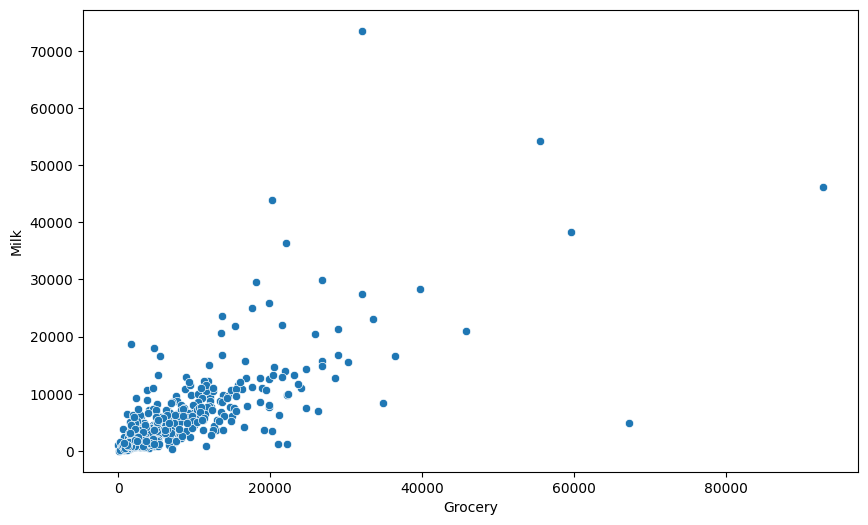

In [ ]:
sns.scatterplot(data = df, x = 'Grocery', y = 'Milk')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std =scaler.fit_transform(df)

In [ ]:
df_std = pd.DataFrame(df_std, columns = df.columns)
df_std.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
df_std = df_std[['Grocery', 'Milk']]

In [ ]:
df_std.head()

,Grocery,Milk
0,-0.041115,0.523568
1,0.170318,0.544458
2,-0.028157,0.408538
3,-0.392977,-0.624020
4,-0.079356,-0.052396


### Code

In [ ]:
#IMPORT DBSCAN
from sklearn.cluster import DBSCAN


def segmentSubscribers(X_train, epsilon, min_samp):

  # INITIALIZE DBSCAN CLASS WITH EPSILON AND MIN_SAMPLES
  dbsc = DBSCAN(eps = epsilon,min_samples=min_samp).fit(X_train)

  # ACCESS LABELS
  labels = dbsc.labels_

  return labels

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbsc = DBSCAN(eps = 0.5, min_samples = 5)
dbsc.fit(df_std)

DBSCAN()

In [ ]:
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
pd.value_counts(labels)

 0    415
-1     25
dtype: int64

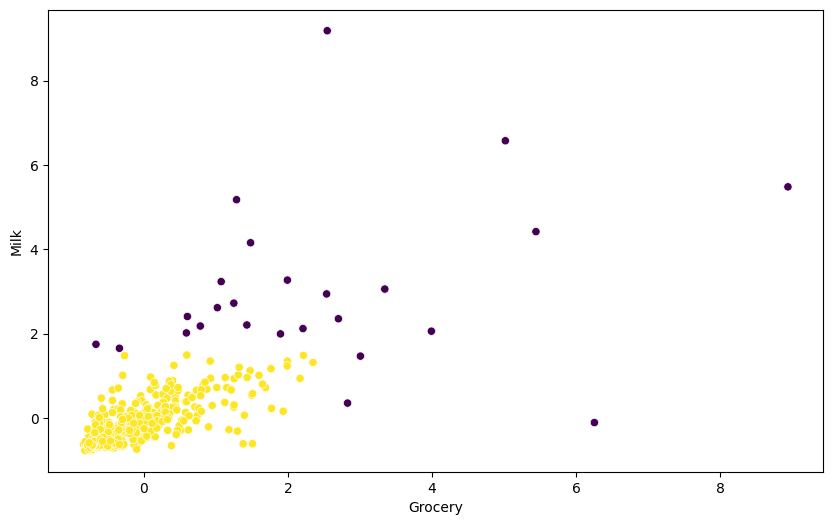

In [ ]:
sns.scatterplot(data = df_std , x= 'Grocery', y = 'Milk', c = labels)
plt.show()

# **Anamoly Detection**

In [ ]:
df = pd.read_csv('AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


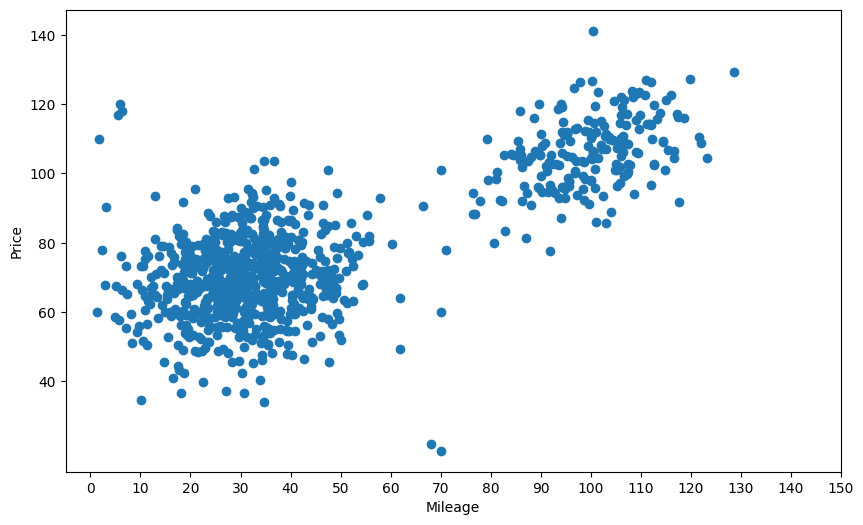

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

## **Elliptic Envolope**

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
df = pd.read_csv('AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


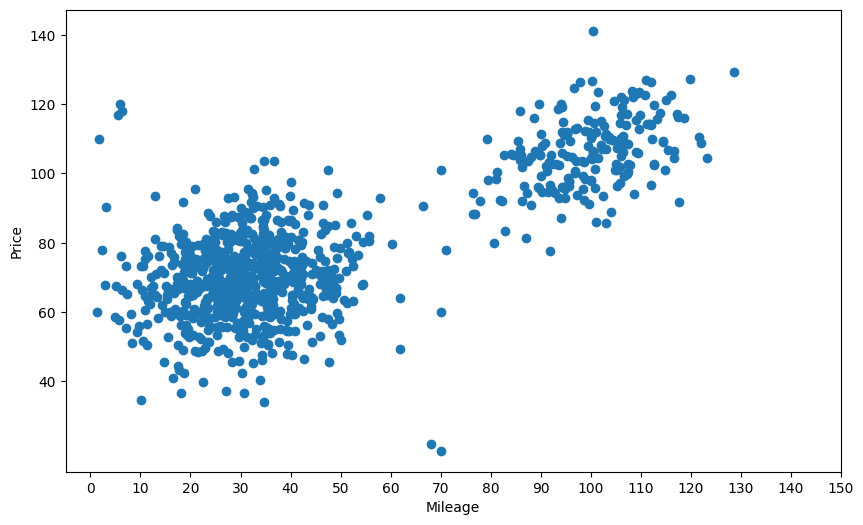

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df.shape

(908, 2)

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
model = EllipticEnvelope(contamination=0.02)
model.fit(df)
df['is_outlier_ee'] = model.predict(df)

In [ ]:
df.head()

,Mileage,Price,is_outlier_ee
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,1


In [ ]:
df['is_outlier_ee'].value_counts()

 1    889
-1     19
Name: is_outlier_ee, dtype: int64

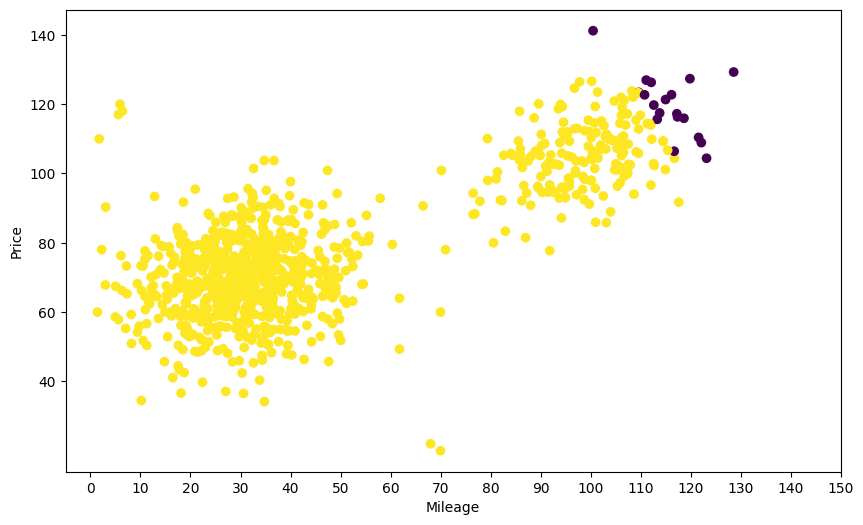

In [ ]:
plt.scatter(df.Mileage, df.Price, c = df['is_outlier_ee'])
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df.head()

,Mileage,Price,is_outlier_ee
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,1


## **Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model = IsolationForest(contamination=0.02)
df['is_outlier_if'] = model.fit_predict(df[['Mileage', 'Price']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df['is_outlier_if'].value_counts()

 1    889
-1     19
Name: is_outlier_if, dtype: int64

In [ ]:
df.head()

,Mileage,Price,is_outlier_ee,is_outlier_if
0,54.282388,67.967708,1,1
1,17.331911,70.023637,1,1
2,36.548113,68.080455,1,1
3,42.567541,71.058755,1,1
4,5.608853,57.822432,1,1


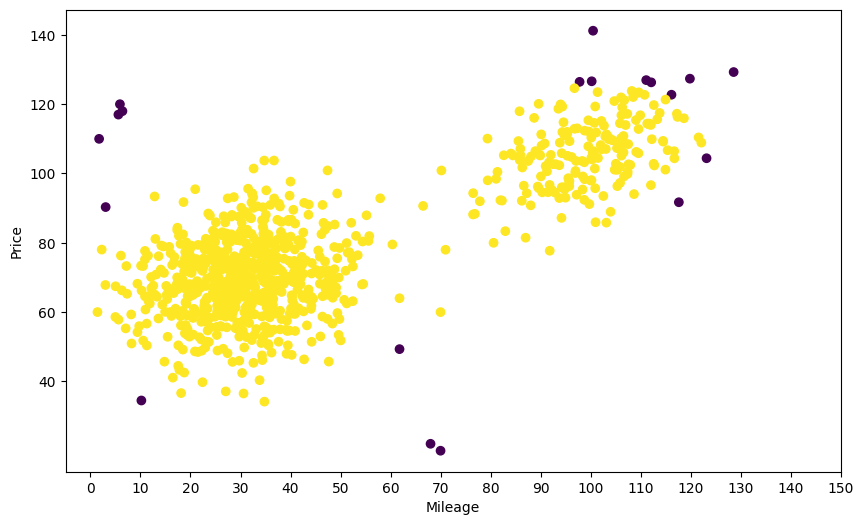

In [ ]:
plt.scatter(df.Mileage, df.Price, c = df['is_outlier_if'])
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
# For Boundary Display

from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

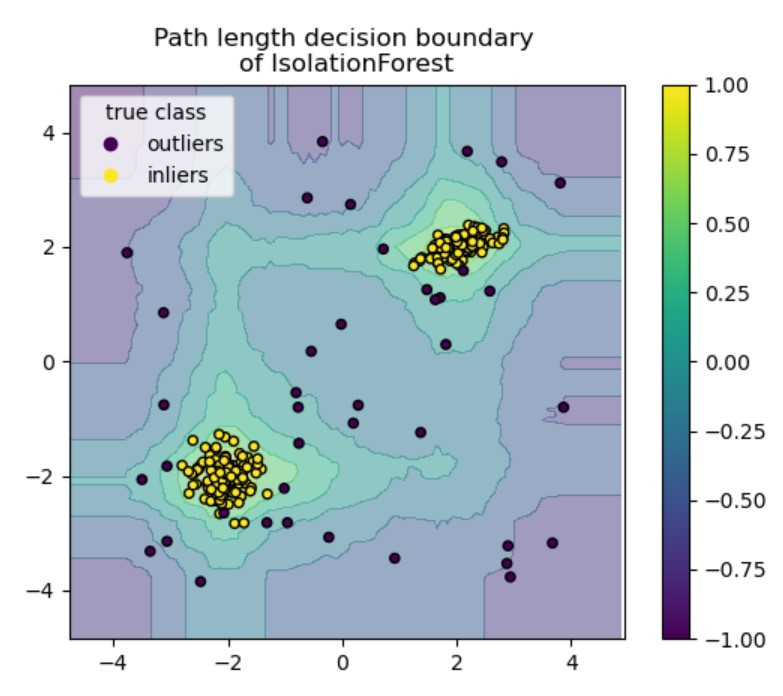

## **LOF [Local Outlier Factor]**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
model = LocalOutlierFactor(contamination=0.015)
df['is_outlier_lof'] = model.fit_predict(df[['Mileage', 'Price']])

In [ ]:
df['is_outlier_lof'].value_counts()

 1    894
-1     14
Name: is_outlier_lof, dtype: int64

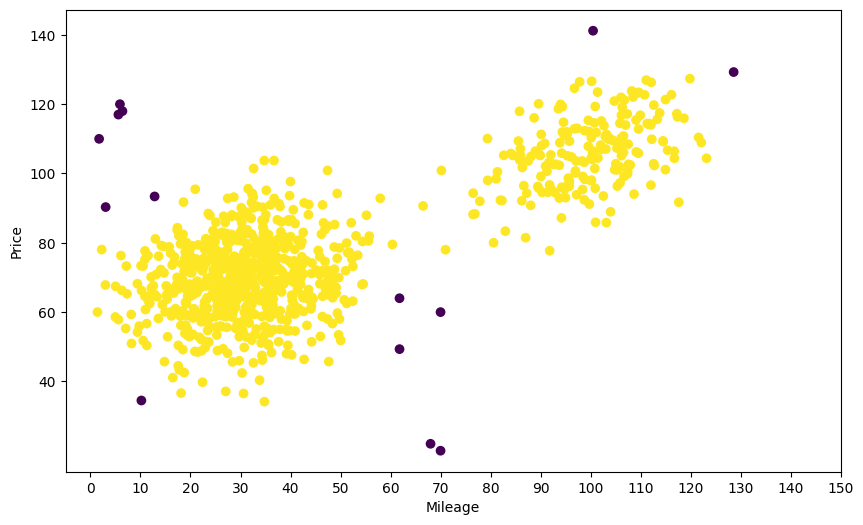

In [ ]:
plt.scatter(df.Mileage, df.Price, c = df['is_outlier_lof'])
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# **High Dimension Visualization**

## PCA

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [28]:
X = digits.data
Y = digits.target
X.shape, Y.shape

((1797, 64), (1797,))

In [8]:
X[0].reshape(8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

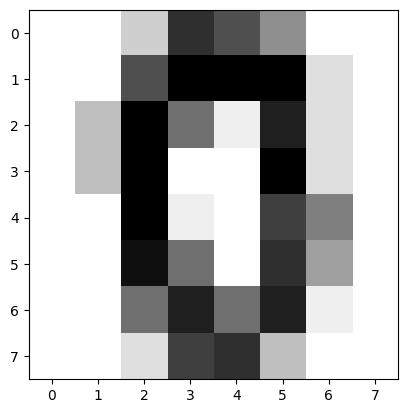

In [9]:
from matplotlib.pyplot import cm

plt.imshow(X[20].reshape(8, 8), cmap = plt.cm.gray_r);

In [10]:
X[Y==0]

array([[0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 1., ..., 3., 0., 0.],
       [0., 0., 3., ..., 4., 0., 0.],
       ...,
       [0., 0., 9., ..., 4., 0., 0.],
       [0., 0., 5., ..., 8., 1., 0.],
       [0., 0., 6., ..., 6., 0., 0.]])

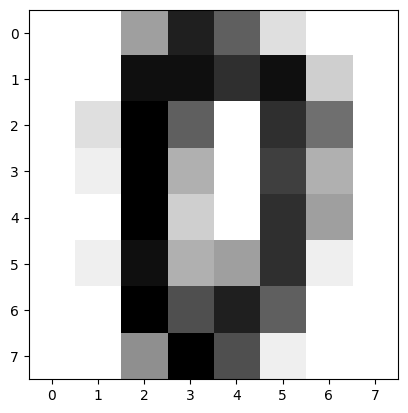

In [11]:
plt.imshow(X[Y==0][4].reshape(8, 8), cmap = plt.cm.gray_r)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Z1 = pca.fit_transform(X)

In [13]:
Z1.shape

(1797, 2)

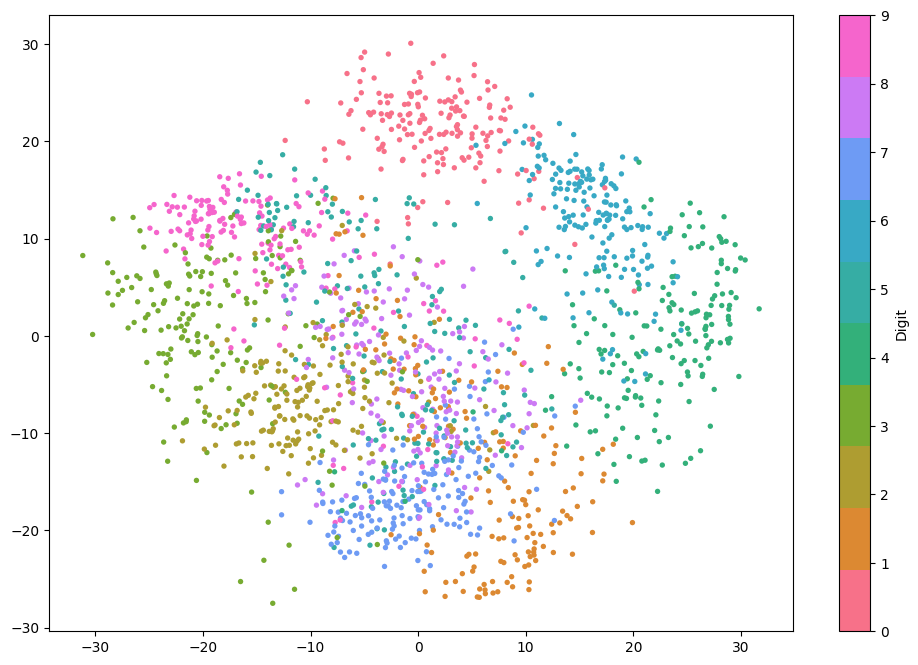

In [15]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(Z1[:,0], Z1[:,1], s=15, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')


### Variance Explantion

In [16]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [17]:
pca.explained_variance_ratio_.sum()

0.2850936482367535

In [19]:
# how many features(n-components) should i take to preserve 95% of variance ?

pca = PCA()
pca.fit(X)

PCA()

In [20]:
pca.explained_variance_ratio_.round(3)

array([0.149, 0.136, 0.118, 0.084, 0.058, 0.049, 0.043, 0.037, 0.034,
       0.031, 0.024, 0.023, 0.018, 0.018, 0.015, 0.014, 0.013, 0.012,
       0.01 , 0.009, 0.009, 0.008, 0.008, 0.007, 0.007, 0.006, 0.006,
       0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [21]:
pca.explained_variance_ratio_.round(4).cumsum()

array([0.1489, 0.2851, 0.403 , 0.4871, 0.5449, 0.5941, 0.6373, 0.6739,
       0.7074, 0.7382, 0.7619, 0.7846, 0.8028, 0.8205, 0.8352, 0.8493,
       0.8625, 0.875 , 0.8852, 0.8943, 0.9032, 0.9112, 0.9189, 0.9261,
       0.9331, 0.9391, 0.9449, 0.9501, 0.955 , 0.9593, 0.963 , 0.9665,
       0.9699, 0.9732, 0.9763, 0.9792, 0.9818, 0.9841, 0.9863, 0.9884,
       0.9903, 0.9919, 0.9934, 0.9948, 0.996 , 0.9971, 0.9981, 0.9989,
       0.9995, 0.9999, 1.0001, 1.0002, 1.0003, 1.0004, 1.0004, 1.0004,
       1.0004, 1.0004, 1.0004, 1.0004, 1.0004, 1.0004, 1.0004, 1.0004])

In [24]:
np.cov(X)

array([[27.29265873,  6.79613095, 10.8531746 , ..., 17.3640873 ,
        22.63095238, 17.41666667],
       [ 6.79613095, 42.51165675, 27.7718254 , ..., 32.96676587,
        22.23214286, 22.06150794],
       [10.8531746 , 27.7718254 , 40.3015873 , ..., 31.66269841,
        19.26984127, 25.23809524],
       ...,
       [17.3640873 , 32.96676587, 31.66269841, ..., 46.13392857,
        27.28174603, 36.62301587],
       [22.63095238, 22.23214286, 19.26984127, ..., 27.28174603,
        39.15873016, 27.66666667],
       [17.41666667, 22.06150794, 25.23809524, ..., 36.62301587,
        27.66666667, 40.26984127]])

In [23]:
np.cov(X).shape

(1797, 1797)

## t-SNE

In [25]:
import numpy as np
from sklearn.manifold import TSNE

In [31]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(X)
X_embedded.shape

(1797, 2)

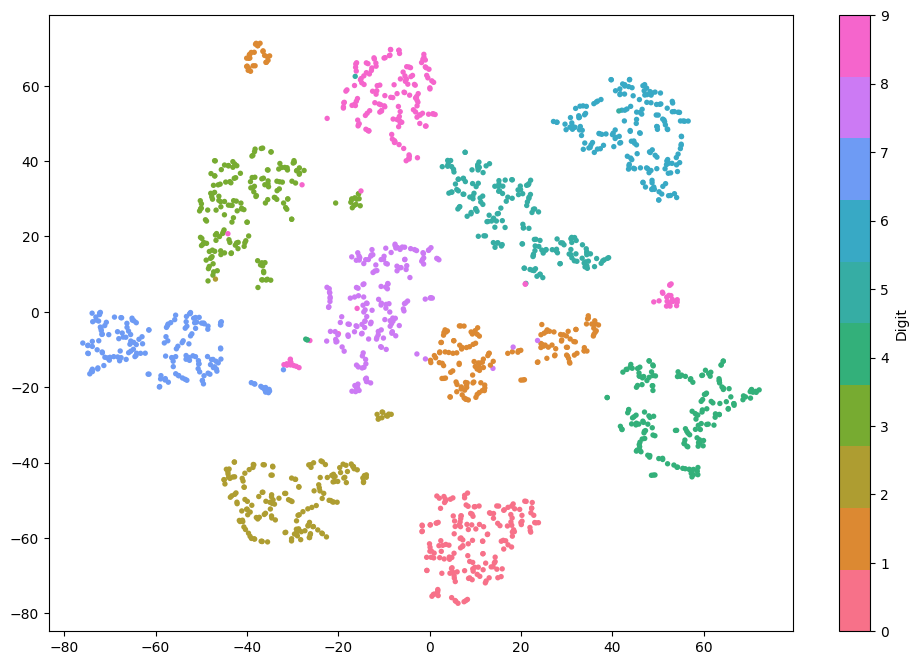

In [32]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(X_embedded[:,0], X_embedded[:,1], s=15, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')


## UMAP

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]


In [ ]:
import umap
import umap.plot

In [37]:
X_embedded_UMAP = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

In [38]:
X_embedded_UMAP.shape

(1797, 2)

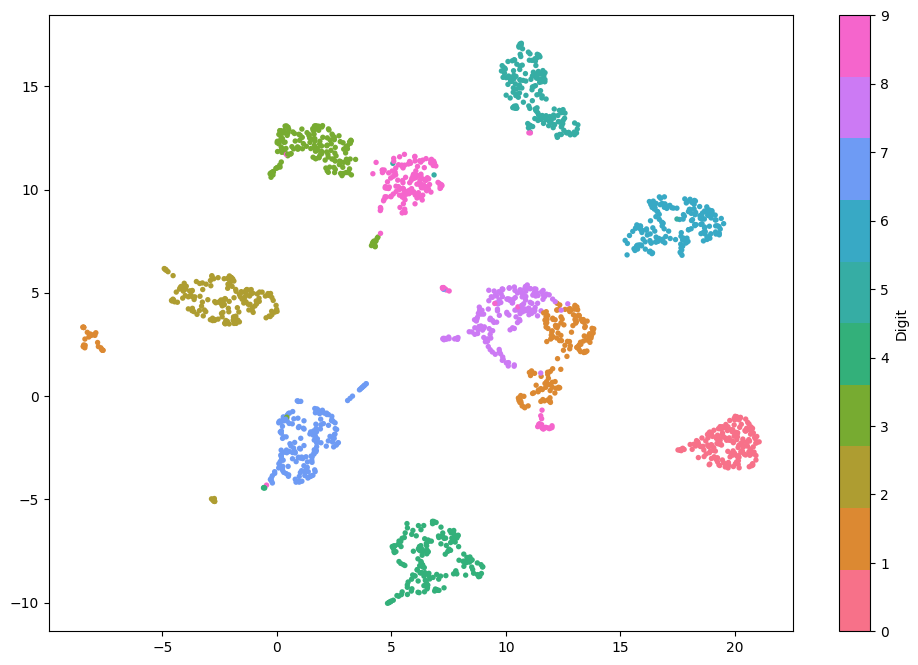

In [39]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))


fig, ax = plt.subplots(figsize=(12, 8))
im = ax.scatter(X_embedded_UMAP[:,0], X_embedded_UMAP[:,1], s=15, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')


* UMAP includes a subpackage umap.plot for plotting the results of UMAP embeddings. This package needs to be imported separately since it has extra requirements (matplotlib, datashader and holoviews). It allows for fast and simple plotting and attempts to make sensible decisions to avoid overplotting and other pitfalls.

<Axes: >

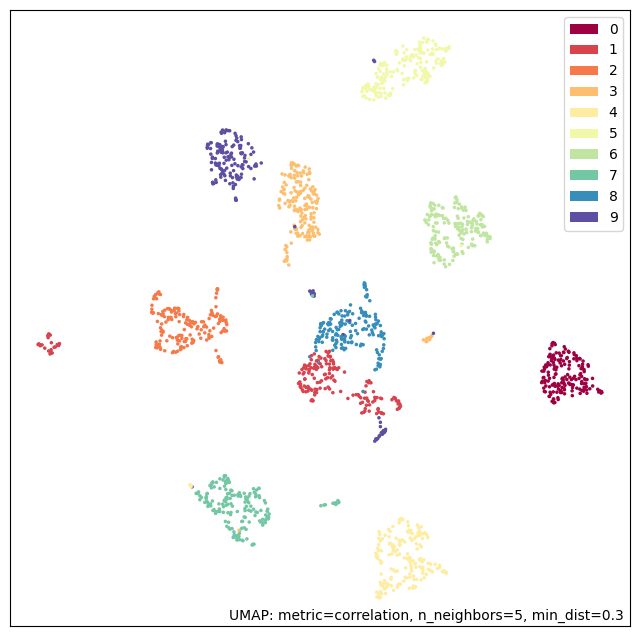

In [45]:
# using Umap Plot

from sklearn.datasets import load_digits

digits = load_digits()

mapper = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit(digits.data)
umap.plot.points(mapper, labels=digits.target)

* The densMAP algorithm augments UMAP to additionally preserve local density information in addition to the topological structure captured by UMAP. One can easily run densMAP using the umap package by setting the densmap input flag:

<Axes: >

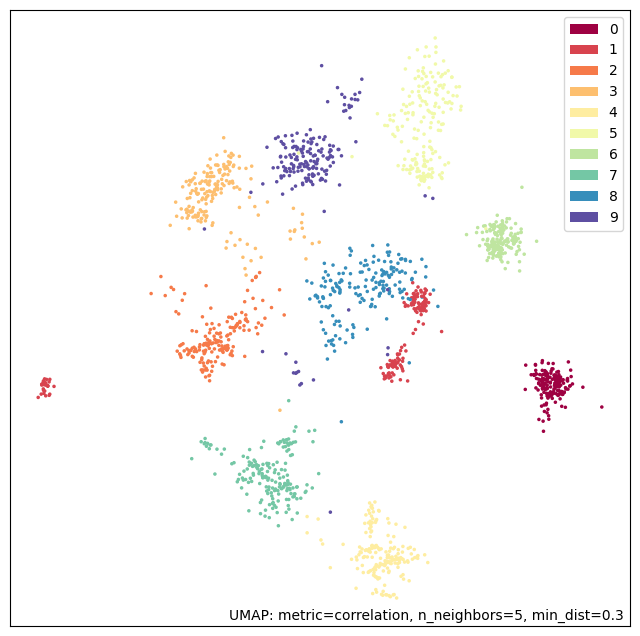

In [49]:
# Densemap

embedding = umap.UMAP(densmap=True,n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit(digits.data)

umap.plot.points(embedding, labels=digits.target)